# SLU13: Bias-Variance trade-off & Model Selection -- Exercises
---

*Exercises are graded unless otherwise indicated.*

In [1]:
import base64
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

%matplotlib inline

### Data
In the learning notebook you've predicted whether a beer would be an IPA or not based on a couple of features. For this exercise notebook, we'll take it a step further and try to predict prices of wine based on their quality. 

_Real classy, huh?_

<img alt="wine" src="media/wine.png" width="400">

Start by loading the data

In [2]:
# This function is designed to be used in all the exercises and make sure the dataset used is stable

def load_dataset():
    # Loads wine prices dataset
    df = pd.read_csv("data/wine_prices.csv")
    
    # Sorts the data to make sure plots will appear nicely later in the notebook later on ;) 
    df_wine = df.set_index('Rating', drop=False).sort_index()

    return df_wine

In [3]:
# Load data
df_wine = load_dataset()
df_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
Rating,,,,,,,,
2.2,Greca Terra Retsina N.V.,Greece,Peloponnesos,Tsantali,2.2,77,5.35,N.V.
2.6,Retsina N.V.,Greece,Macedonia,Tsantali,2.6,1011,3.95,N.V.
2.7,Veneto Bianco 2017,Italy,Veneto,Cantina di Soave,2.7,25,5.42,2017
2.8,Chardonnay 2018,United States,California,Gallo Family Vineyards,2.8,394,6.30,2018
2.8,Virtus Moscato 2016,Brazil,Serra Gaúcha,Monte Paschoal,2.8,30,6.77,2016


In [4]:
df_wine.shape

(3764, 8)

To simplify, we'll ignore other features and only use the ratings of the wines to predict its prices. So, we'll set our (X, y) pair and plot the data points we have:

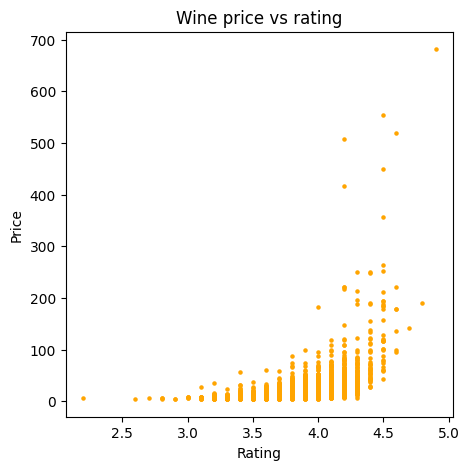

In [5]:
X = df_wine[['Rating']]
y = df_wine['Price']

plt.figure(figsize=(5,5))
plt.scatter(X, y, c='orange', s=5)
plt.title('Wine price vs rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show();

## Exercise 1: Bias-variance trade-off

So let's say we want to create a model to predict the relationship above so, in order to do that, we decide to try a couple of the Machine Learning models you've learned about.

Start by implementing a function to fit and return the mean squared error of a simple `LinearRegression`:

In [6]:
def fit_lr_estimator(X, y):
    """ 
        Fits `LinearRegression` and predict mean squared error of 
        predictions for the provided data.
    
    Args:
        X (pd.DataFrame): the input DataFrame
        y (pd.Series): the target labels

    Returns: estimator, error
        estimator (LinearRegression): fitted estimator
        error (float): mean squared error in provided data
        
    """
    
    estimator = LinearRegression()
    estimator.fit(X, y)
    
    y_hat = estimator.predict(X)
    
    error = mean_squared_error(y, y_hat)

    return estimator, error


Verify that your code passes the tests:

In [7]:
df = load_dataset()
X = df_wine[['Rating']]
y = df_wine['Price']

lr, lr_error = fit_lr_estimator(X, y)

predictions = lr.predict(X)

np.testing.assert_almost_equal(predictions[10], -23.3191, 2)
np.testing.assert_almost_equal(predictions[123], -7.2025, 2)
np.testing.assert_almost_equal(lr_error, 750.890, 2)

In [8]:
fit_lr_estimator(X, y)

(LinearRegression(), 750.8909095923652)

Now plot the data to see how well our model estimates the data:

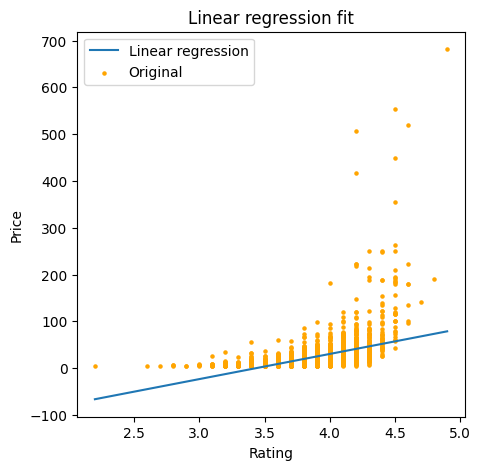

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(X.values, y, c='orange', s=5, label="Original")
plt.plot(X.values, predictions, label="Linear regression")
plt.legend()
plt.title('Linear regression fit')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show();

**Q1.1) What can you say about this model:**
    
- A) It has a high bias and low variance, as it is overly flexible and overreact to the specifics of the training data
- B) It has a low bias and high variance, as it makes over-simplistic assumptions about the distribution
- C) It has a high bias and low variance, as it makes over-simplistic assumptions about the distribution
- D) None of the above


Enter your answer below wrapped by quotes, for example:

```
answer_q11 = "A"
```


In [10]:
# answer_q11 = 'A' or 'B' or 'C' or 'D'

answer_q11 = "C"

In [11]:
assert base64.b64encode(answer_q11.encode()) == b'Qw=='

You now decide that you want to try a slightly more complex approach and, by looking at the data, you wonder if adding some polynomial features would help.

You create a function to provide polynomial features for your data:

In [12]:
def polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly


You apply it with some different degrees and plot it:

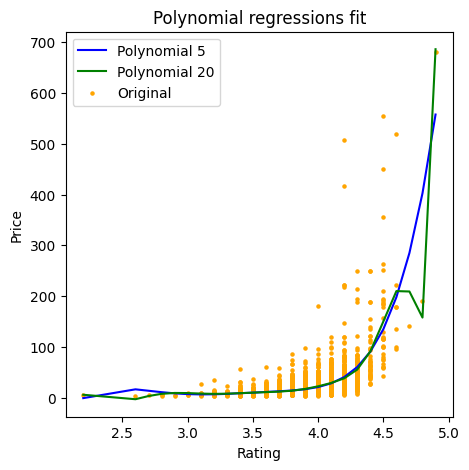

In [13]:
X_poly_5 =  polynomial_features(X, degree=5)
X_poly_20 = polynomial_features(X, degree=20)

lr_poly_5, lr_error_poly_5 = fit_lr_estimator(X_poly_5, y)
predictions_poly_5 = lr_poly_5.predict(X_poly_5)

lr_poly_20, lr_error_poly_20 = fit_lr_estimator(X_poly_20, y)
predictions_poly_20 = lr_poly_20.predict(X_poly_20)


X = df_wine[['Rating']]
y = df_wine[['Price']]

plt.figure(figsize=(5,5))
plt.scatter(X.values, y, c='orange', s=5, label="Original")
plt.plot(X.values, predictions_poly_5, c='blue', label="Polynomial 5")
plt.plot(X.values, predictions_poly_20, c='green', label="Polynomial 20")
plt.legend()
plt.title('Polynomial regressions fit')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show();

**Q1.2) What can you say about the polynomial with degree 20:**
    
- A) It has a low bias and high variance, as it makes over-simplistic assumptions about the distribution
- B) It has a low bias and high variance, as it is overly flexible and overreact to the specifics of the training data
- C) It's a perfect fit for the data
- D) None of the above

Enter your answer below wrapped by quotes, for example:

```
answer_q12 = "A"
```


In [14]:
# answer_q12 = 'A' or 'B' or 'C' or 'D'

answer_q12 = "B"

In [15]:
assert base64.b64encode(answer_q12.encode()) == b'Qg=='

Finally, you decide to plot all the errors to decide which model is the best:

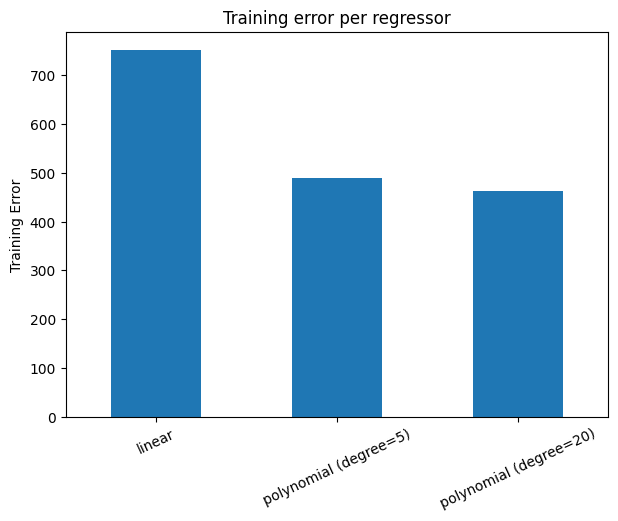

In [16]:
training_error = {
    "linear": lr_error,
    "polynomial (degree=5)": lr_error_poly_5,
    "polynomial (degree=20)": lr_error_poly_20,

}

pd.Series(training_error).plot(figsize=(7, 5), kind='bar', rot=25)
plt.ylabel('Training Error')
plt.title('Training error per regressor')
plt.show()

**Q1.3) If you were to choose based on the training error, which one would you choose?**
    
- A) Linear
- B) Polynomial with degree 5
- C) Polynomial with degree 20

Enter your answer below wrapped by quotes, for example:

```
answer_q13 = "A"
```

In [17]:
# answer_q13 = 'A' or 'B' or 'C' or 'D'

answer_q13 = "C"

In [18]:
assert base64.b64encode(answer_q13.encode()) == b'Qw=='

## Exercise 2: Train/validation/test split

You now decide to try out a few of the methods you've learned in this unit. 

You start with the holdout method. Create a function that splits your data into train and test set. Assume the test set is **35%** of the full dataset. Use a **random state** of 42

Implement that function below:

In [19]:
def holdout_method(X, y):
    """ 
        Implement the holdout method: a train test split with proportion 65-35, 
        this is, where the test size should be 35% of the size of the dataset
        
        **For reproducibility: Use random state of 42 always**
    
    Args:
        X (pd.DataFrame): the input DataFrame X
        y (pd.Series): the target labels

    Returns: X_train, X_test, y_train, y_test
        X_train (pd.DataFrame): the input DataFrame X of the training sample 
        X_test (pd.DataFrame): the input DataFrame X of the test sample
        y_train (pd.Series): the target labels of the training sample
        y_test (pd.Series): the target labels of the test sample
        
    """
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    return X_train, X_test, y_train, y_test


Test your function below to ensure it returns the desired outputs:

In [20]:
df = load_dataset()
X = df_wine[['Rating']]
y = df_wine['Price']

X_train, X_test, y_train, y_test = holdout_method(X, y)

np.testing.assert_almost_equal(X_train.Rating.values[10], 3.8, 2)
np.testing.assert_almost_equal(X_train.Rating.values[42], 3.9, 2)
np.testing.assert_almost_equal(X_train.Rating.values[1402], 4.5, 2)

np.testing.assert_almost_equal(X_test.Rating.values[2], 3.4, 2)
np.testing.assert_almost_equal(X_test.Rating.values[33], 4.3, 2)
np.testing.assert_almost_equal(X_test.Rating.values[932], 3.7, 2)

np.testing.assert_almost_equal(y_train.values[213], 8.99, 2)
np.testing.assert_almost_equal(y_train.values[677], 9.99, 2)
np.testing.assert_almost_equal(y_train.values[2000], 11.35, 2)

np.testing.assert_almost_equal(y_test.values[114], 9.45, 2)
np.testing.assert_almost_equal(y_test.values[277], 7.90, 2)
np.testing.assert_almost_equal(y_test.values[1000], 6.90, 2)


You can now use your function to split your dataset and train only on a sample of it. Run the cell below to do so and plot the resulting predictions for the training set:

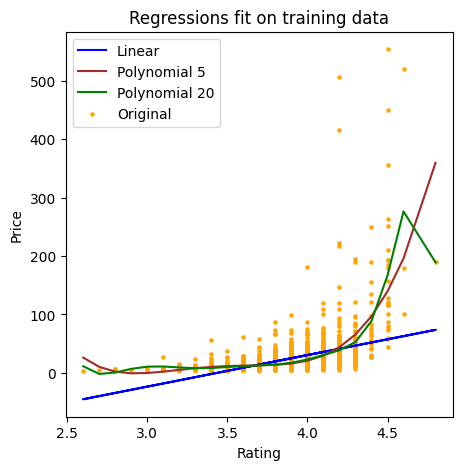

In [21]:
X_train, X_test, y_train, y_test = holdout_method(X, y)

# Compute polynomial features with degree 5
X_train_poly_5 =  polynomial_features(X_train, degree=5)
X_test_poly_5 =  polynomial_features(X_test, degree=5)

# Compute polynomial features with degree 50
X_train_poly_20 = polynomial_features(X_train, degree=20)
X_test_poly_20 = polynomial_features(X_test, degree=20)

# Fit all estimators
lr, _ = fit_lr_estimator(X_train, y_train)
lr_poly_5, lr_error_poly_5 = fit_lr_estimator(X_train_poly_5, y_train)
lr_poly_20, lr_error_poly_20 = fit_lr_estimator(X_train_poly_20, y_train)

predictions_lr = lr.predict(X_train)
predictions_poly_5 = lr_poly_5.predict(X_train_poly_5)
predictions_poly_20 = lr_poly_20.predict(X_train_poly_20)

plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, c='orange', s=5, label="Original")
plt.plot(X_train.values, predictions_lr, c='blue', label="Linear")

X_train_plot, predictions_poly_5_plot = zip(*sorted(zip(X_train.values, predictions_poly_5)))
plt.plot(X_train_plot, predictions_poly_5_plot, c='brown', label="Polynomial 5")

X_train_plot, predictions_poly_20_plot = zip(*sorted(zip(X_train.values, predictions_poly_20)))
plt.plot(X_train_plot, predictions_poly_20_plot, c='green', label="Polynomial 20")
plt.legend()
plt.title('Regressions fit on training data')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show();

Our data changed but the effects of the different estimators are still visible as before. Answer the following question:
    
**Q1.4) What would you say about the models above?**
    
- A) `Linear` model is underfitting and `Polynomial 20` overfitting
- B) Both `Linear` model and `Polynomial 5` are overfitting
- C) `Linear` model is overfitting and `Polynomial 20` underfitting
- D) All models are underfitting

Enter your answer below wrapped by quotes, for example:

```
answer_q14 = "A"
```

In [22]:
# answer_q14 = 'A' or 'B' or 'C' 

answer_q14 = "A"

In [23]:
assert base64.b64encode(answer_q14.encode()) == b'QQ=='

Finally, we want to see the different In-sample and Out-of-sample errors. Start by implementing a function to return both the predictions of an estimator and the associated regression error which, in this particular case, we want it to be given by the mean squared error.

Implement the function below:


In [24]:
def regression_error(estimator, X, y):
    """ 
        Implement a method that takes a regressor `estimator`, predicts values for 
        the provided features `X` and returns both the predictions and
        mean squared error
    
    Args:
        estimator (sklearn.base.BaseEstimator): estimator with predict method
        X (pd.DataFrame): the input DataFrame X
        y (pd.Series): the target true labels

    Returns: predictions, error
        predictions (pd.Series): the preidcted labels
        error (float): mean squared error in provided data
    """
    
    predictions = estimator.predict(X)
    error = mean_squared_error(y, predictions)


    return predictions, error


Test it in the assertions below:

In [25]:
df = load_dataset()
X = df_wine[['Rating']]
y = df_wine['Price']

# estimator to be used for these tests only
estimator = DecisionTreeRegressor()
estimator.fit(X, y)

preditions, error = regression_error(estimator, X, y)

np.testing.assert_almost_equal(preditions[10], 7.2159, 2)
np.testing.assert_almost_equal(preditions[42], 9.0032, 2)
np.testing.assert_almost_equal(preditions[1402], 12.4064, 2)

np.testing.assert_almost_equal(error, 456.3274, 2)

We can now use this function to get our training (In-sample) and test (Out-of-sample) errors. Run the cell below to compute them and plot the results:

<Figure size 700x500 with 0 Axes>

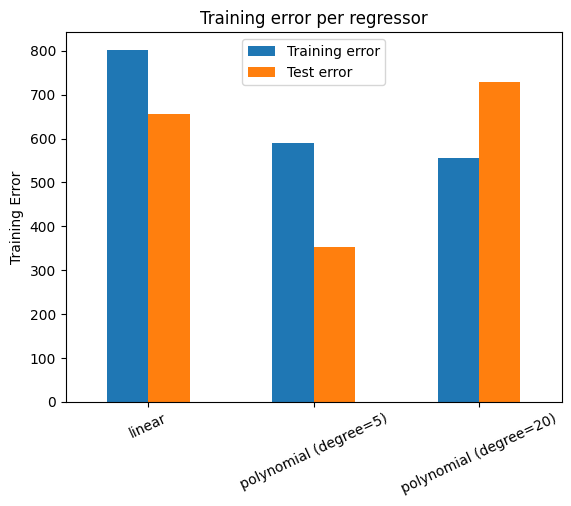

In [26]:
# Predict for train and test samples and plot errors
lr_train_preds, lr_train_error = regression_error(lr, X_train, y_train)
lr_test_preds, lr_test_error = regression_error(lr, X_test, y_test)

lr_poly_5_train_preds, lr_poly_5_train_error = regression_error(lr_poly_5, X_train_poly_5, y_train)
lr_poly_5_test_preds, lr_poly_5_test_error = regression_error(lr_poly_5, X_test_poly_5, y_test)

lr_poly_20_train_preds, lr_poly_20_train_error = regression_error(lr_poly_20, X_train_poly_20, y_train)
lr_poly_20_test_preds, lr_poly_20_test_error = regression_error(lr_poly_20, X_test_poly_20, y_test)

training_error = pd.Series({
    "linear": lr_train_error,
    "polynomial (degree=5)": lr_poly_5_train_error,
    "polynomial (degree=20)": lr_poly_20_train_error,

})

testing_error = pd.Series({
    "linear": lr_test_error,
    "polynomial (degree=5)": lr_poly_5_test_error,
    "polynomial (degree=20)": lr_poly_20_test_error,

})

index = ['linear', 'polynomial (degree=5)', 'polynomial (degree=20)']
df = pd.DataFrame({'Training error': training_error, 'Test error': testing_error}, index=index)

plt.figure(figsize=(7, 5));
df.plot.bar(rot=25);

plt.ylabel('Training Error');
plt.title('Training error per regressor');
plt.show();

**Q2.1) If you were to choose now based on the test error, which model would you choose?**
    
- A) Linear
- B) Polynomial with degree 5
- C) Polynomial with degree 20

Enter your answer below wrapped by quotes, for example:

```
answer_q21 = "A"
```

In [27]:
# answer_q21 = 'A' or 'B' or 'C' 

answer_q21 = "B"

In [28]:
assert base64.b64encode(answer_q21.encode()) == b'Qg=='

Great! We've seen how having a held-out test set can lead us to better models than just blindly training on all the data without further consideration. Take it one step further and implement the train-test-validation split: 

In [29]:
def train_test_validation(X, y):
    """ 
        Implement a train-validation-test split with proportion 50-25-25, this is, 
        where the validation set and the test set should each be 25% of the size of 
        the dataset
        
        **For reproducibility: Use random state of 42 always and sample the validation set first**
    
    Args:
        X (pd.DataFrame): the input DataFrame X
        y (pd.Series): the target labels

    Returns: X_train, X_test, y_train, y_test
        X_train (pd.DataFrame): the input DataFrame X of the training sample 
        X_val (pd.DataFrame): the input DataFrame X of the validation sample 
        X_test (pd.DataFrame): the input DataFrame X of the test sample
        y_train (pd.Series): the target labels of the training sample
        y_val (pd.Series): the target labels of the validation sample
        y_test (pd.Series): the target labels of the test sample
        
    """
    
    X_temp, X_val, y_temp, y_val  = train_test_split(X, y, test_size=0.25, random_state=42)
    
    X_train, X_test, y_train, y_test  = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
    del X_temp, y_temp

    return X_train, X_val, X_test, y_train, y_val, y_test

Test your function below to ensure it returns the desired outputs:

In [30]:
df = load_dataset()
X = df_wine[['Rating']]
y = df_wine['Price']

X_train, X_val, X_test, y_train, y_val, y_test = train_test_validation(X, y)

np.testing.assert_almost_equal(X_train.Rating.values[10], 3.8, 2)
np.testing.assert_almost_equal(X_train.Rating.values[42], 3.4, 2)
np.testing.assert_almost_equal(X_train.Rating.values[1402], 3.5, 2)

np.testing.assert_almost_equal(X_val.Rating.values[14], 4.1, 2)
np.testing.assert_almost_equal(X_val.Rating.values[59], 3.8, 2)
np.testing.assert_almost_equal(X_val.Rating.values[422], 3.9, 2)

np.testing.assert_almost_equal(X_test.Rating.values[2], 4.1, 2)
np.testing.assert_almost_equal(X_test.Rating.values[33], 3.8, 2)
np.testing.assert_almost_equal(X_test.Rating.values[632], 4.0, 2)

np.testing.assert_almost_equal(y_train.values[213], 263.9, 2)
np.testing.assert_almost_equal(y_train.values[677], 11.94, 2)
np.testing.assert_almost_equal(y_train.values[2000], 29.45, 2)

np.testing.assert_almost_equal(y_val.values[123], 9.95, 2)
np.testing.assert_almost_equal(y_val.values[518], 14.90, 2)
np.testing.assert_almost_equal(y_val.values[663], 8.90, 2)

np.testing.assert_almost_equal(y_test.values[114], 23.9, 2)
np.testing.assert_almost_equal(y_test.values[277], 8.45, 2)
np.testing.assert_almost_equal(y_test.values[700], 7.29, 2)


We can now see how you could use this validation set, say, to optimize the polynomial degree used, and then check the final performance on the test set:

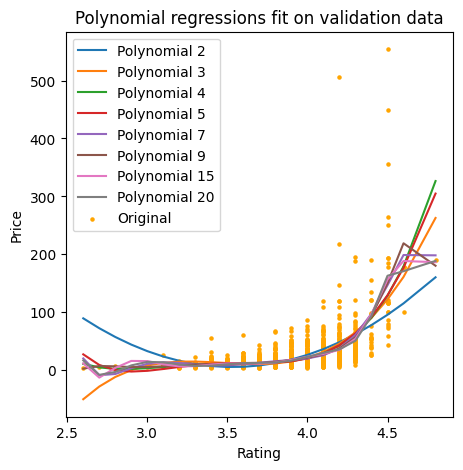

In [31]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_validation(X, y)

polynomial_train_error = {}
polynomial_val_error = {}
polynomial_test_error = {}

plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, c='orange', s=5, label="Original")

for degree in [2, 3, 4, 5, 7, 9, 15, 20]:
    polynomial_label = "Polynomial {}".format(degree)
    
    X_train_poly =  polynomial_features(X_train, degree=degree)
    X_val_poly =  polynomial_features(X_val, degree=degree)
    X_test_poly =  polynomial_features(X_test, degree=degree)

    lr_poly, lr_error_poly = fit_lr_estimator(X_train_poly, y_train)

    lr_poly_train_preds, lr_poly_train_error = regression_error(lr_poly, X_train_poly, y_train)
    lr_poly_val_preds, lr_poly_val_error = regression_error(lr_poly, X_val_poly, y_val)
    lr_poly_test_preds, lr_poly_test_error = regression_error(lr_poly, X_test_poly, y_test)

    polynomial_train_error.update({polynomial_label: lr_poly_train_error})
    polynomial_val_error.update({polynomial_label: lr_poly_val_error})
    polynomial_test_error.update({polynomial_label: lr_poly_test_error})

    X_train_plot, predictions_poly_plot = zip(*sorted(zip(X_train.values, lr_poly_train_preds)))
    plt.plot(X_train_plot, predictions_poly_plot, label=polynomial_label)

    
plt.legend()
plt.title('Polynomial regressions fit on validation data')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show();



We can see roughly that some fit better than others but it doesn't automatically tell us which one is best. Let's instead plot the training/validation errors:

<Figure size 2000x2000 with 0 Axes>

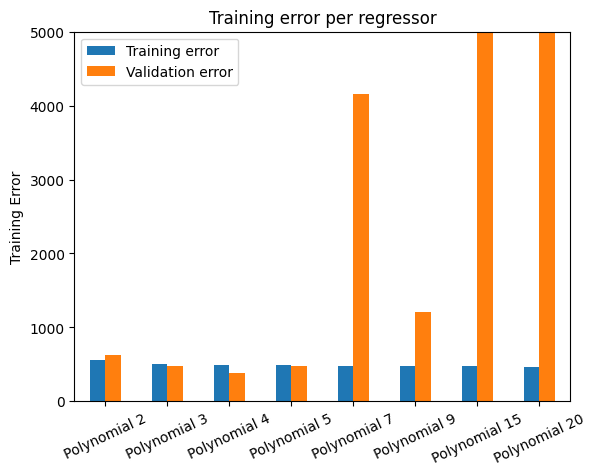

In [32]:
# Plot errors for all polynomials

index = polynomial_val_error.keys()
df = pd.DataFrame({'Training error': polynomial_train_error, 'Validation error': polynomial_val_error}, index=index)

plt.figure(figsize=(20, 20));
df.plot.bar(rot=25);

plt.ylim(0, 5000)
plt.ylabel('Training Error');
plt.title('Training error per regressor');
plt.show();


Seems like we're getting there. The next step would be to really extract the polynomial degree that yields the lowest error. Let's do that:


In [33]:
sorted_errors = sorted(polynomial_val_error.items(), key=lambda x: x[1])
min_error = sorted_errors[0][1]
min_degree = sorted_errors[0][0]

print("Minimum validation error at {}: {}".format(min_degree, min_error))

Minimum validation error at Polynomial 4: 381.68390520919314


Let's finally plot the test errors comparing both our optimized polynomial, the 2 previous random values (5 and 20) and the initial linear regression to verify that optimizing using the validation set will reflect finally on the held-out test set.

<Figure size 2000x2000 with 0 Axes>

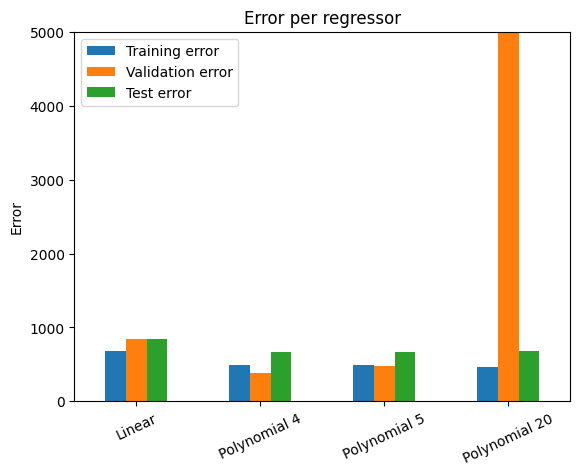

Minimum test error at Polynomial 4: 665.4029037583052


In [34]:
lr, lr_error = fit_lr_estimator(X_train, y_train)
predictions_lr = lr.predict(X_train)

lr_train_preds, lr_train_error = regression_error(lr, X_train, y_train)
lr_test_preds, lr_val_error = regression_error(lr, X_test, y_test)
lr_test_preds, lr_test_error = regression_error(lr, X_test, y_test)

train_errors = {"Linear": lr_train_error}
validation_errors = {"Linear": lr_val_error}
test_errors = {"Linear": lr_test_error}

for polynomial in [
    "Polynomial 4",  # Optimized value
    "Polynomial 5",  # Previous good value
    "Polynomial 20", # Previous overfitted value

]:
    train_errors[polynomial] = polynomial_train_error[polynomial]
    validation_errors[polynomial] = polynomial_val_error[polynomial]
    test_errors[polynomial] = polynomial_test_error[polynomial]

index = test_errors.keys()
df = pd.DataFrame(
    {
        'Training error': train_errors, 
        'Validation error': validation_errors,
        'Test error': test_errors
    }, index=index)

plt.figure(figsize=(20, 20));
df.plot.bar(rot=25);

plt.ylim(0, 5000)
plt.ylabel('Error');
plt.title('Error per regressor');
plt.show();

sorted_errors = sorted(test_errors.items(), key=lambda x: x[1])
min_error = sorted_errors[0][1]
min_degree = sorted_errors[0][0]

print("Minimum test error at {}: {}".format(min_degree, min_error))


Congratulations, you've now successfully used the train-validation-test method to optimize a model using a validation set and then compare it fairly on a held-out test set!

_This calls for a toast!_

<img alt="wine_toast" src="media/wine_toast.jpg" width="400">



## Exercise 3: K-fold cross-validation

For the final method, we are going to try to take advantage of as much data as possible and use k-fold cross validation to approximate our OSE. 

Implement a function that runs the `cross_val_score` on a given estimator and returns the average error on 5 folds:


In [35]:
# Hint: You will need this, feel free to use it directly
mse_scorer = make_scorer(mean_squared_error)

In [36]:
def cross_fold_validation(estimator, X, y):
    """ 
        Implement a cross validation assessment that returns the mean squared error
        score for a 5-fold run on the given estimator
            
    Args:
        estimator (sklearn.base.BaseEstimator): estimator to run cross validation fold on
        X (pd.DataFrame): the input DataFrame X
        y (pd.Series): the target labels

    Returns: mse_cv
        mse_cv (float): mean error on the 5-fold run 
        
    """
    #estimator.fit(X, y)
    
    #y_hat = estimator.predict(X)
    
    #mean_squared_error = mean_squared_error(y, y_hat)
    
    #mse_scorer = make_scorer(mean_squared_error)
    scores = cross_val_score(estimator, X, y, cv=5, scoring='neg_mean_squared_error')

    mse_cv = np.mean(scores) * -1

    return mse_cv


In [37]:
df = load_dataset()
X = df_wine[['Rating']]
y = df_wine['Price']

lr = LinearRegression()
mse_cv_lr = cross_fold_validation(lr, X, y)
np.testing.assert_almost_equal(mse_cv_lr, 1065.6411, 2)


lr_poly = LinearRegression()
X_poly =  polynomial_features(X, degree=4)
mse_cv_poly = cross_fold_validation(lr_poly, X_poly, y)

np.testing.assert_almost_equal(mse_cv_poly, 1170.41, 2)


Now let's do the same as before and try to find the best regressor using these cross validation scores:

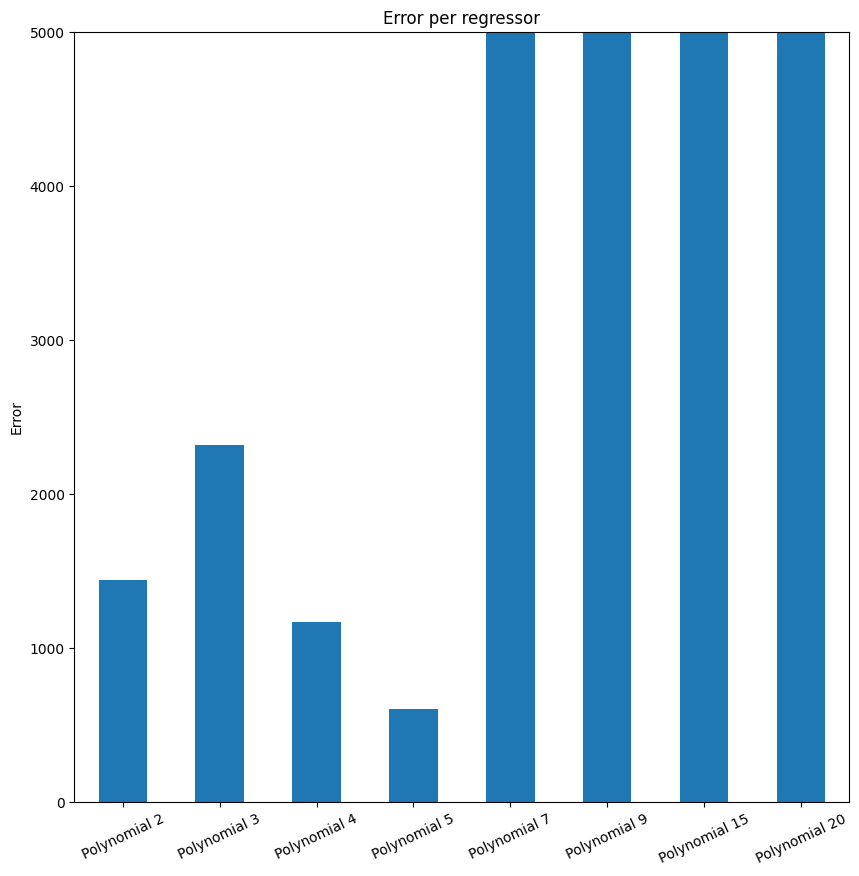

In [38]:
polynomial_cv_error = {}


lr = LinearRegression()
for degree in [2, 3, 4, 5, 7, 9, 15, 20]:
    polynomial_label = "Polynomial {}".format(degree)
    X_poly =  polynomial_features(X, degree=degree)

    mse_cv = cross_fold_validation(lr, X_poly, y)

    polynomial_cv_error.update({polynomial_label: mse_cv})

    
plt.figure(figsize=(10, 10));
pd.Series(polynomial_cv_error).plot.bar(rot=25);

# Capping the chart at 4000 so it's easy to read
plt.ylim(0, 5000)
plt.ylabel('Error');
plt.title('Error per regressor');
plt.show();


In [39]:

sorted_errors = sorted(polynomial_cv_error.items(), key=lambda x: x[1])
min_error = sorted_errors[0][1]
min_degree = sorted_errors[0][0]

print("Minimum cross-validation error at {}: {}".format(min_degree, min_error))


Minimum cross-validation error at Polynomial 5: 605.209323583627


Nicely done!

Notice that this time we got the polynomial 5 instead of 4, so what's up with that? Well, if you go back and look at the previous method you will see the validation and test errors for this degree were very very close to 4, so it took just a small change in the data used to yield this difference.



## Exercise 4: Learning curves

You made it to the final exercise. In this exercise, you have to figure out if we have enough data or if we should use more. We want you to use the learning curve method you've seen to figure this out.

Implement the following: 

1. Define a numpy array of train_sizes, from 10% of the data to 100%, in increments of 5% (0.1, 0.2, 0.3... etc) 


2. Get the learning curve data, with the following configuration:
    - estimator: estimator to run cross validation fold on 
    - metric: use mean squared error (you can reuse mse_scorer from before) as your metric 
    - use the train sizes array you just created
    - all features, not normalized 
    - cv = 5 
    - random state = 42 (needed to pass the grader) 
    - n_jobs = -1 (optional, but faster) 

As with the learning notebooks, you should save the output to `train_sizes_abs`, `train_scores` and `test_scores`. 

Hint: Recall that Scikit-learn offers `sklearn.model_selection.learning_curve`.

In [40]:
def get_learning_curve(estimator, X, y):
    """ 
        Implement a learning curve computation for different training sizes,
        from 10% of the data to 100%, in increments of 5% (0.1, 0.2, 0.3... etc) 
        
        **For reproducibility: Use random state of 42 always**
    
    Args:
        estimator (sklearn.base.BaseEstimator): estimator to run cross validation fold on
        X (pd.DataFrame): the input DataFrame X
        y (pd.Series): the target labels

    Returns: train_sizes, train_sizes_abs, train_scores, test_scores
        train_sizes (float): mean error on the 5-fold run 
        train_sizes_abs (float): mean error on the 5-fold run 
        train_scores (float): mean error on the 5-fold run 
        test_scores (float): mean error on the 5-fold run 
    """
    
    train_sizes = np.linspace(.1, 1.0, 19)
    
    
    train_sizes_abs, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, train_sizes= train_sizes,cv=5,scoring="neg_mean_squared_error" ,n_jobs=-1,
    random_state=42)
    
    #Since the metric user gives neg mse, need to be mul by -1
    train_scores = train_scores * -1
    test_scores = test_scores * -1
    
    # train_sizes_abs, train_scores, test_scores

    return train_sizes, train_sizes_abs, train_scores, test_scores






In [41]:
df = load_dataset()

# Our dataset was sorted, to avoid the slices of data being sorted also we shuffle it
df = df.sample(frac=1, random_state=42)

X = df[['Rating']]
y = df['Price']


lr = LinearRegression()

# We'll use the best fit from the train-val-test method
X_poly = PolynomialFeatures(4).fit_transform(X)

train_sizes, train_sizes_abs, train_scores, test_scores = get_learning_curve(lr, X_poly, y)

assert np.nan not in train_scores 
assert np.nan not in test_scores 

np.testing.assert_almost_equal(train_sizes.sum(), 10.45, 2)
np.testing.assert_almost_equal(train_sizes.mean(), .55, 2)
assert len(train_sizes) == 19

np.testing.assert_almost_equal(train_sizes_abs.mean(), 1655.58, 2)
np.testing.assert_almost_equal(round(pd.DataFrame(train_scores).mean().median(), 2), 473.71, 2)
np.testing.assert_almost_equal(round(pd.DataFrame(test_scores).mean().median(), 2), 361.9, 2)

3. Now plot it! _(feel free to use plot_learning_curve that we used in the learning notebook, but remember that's custom code)_ 


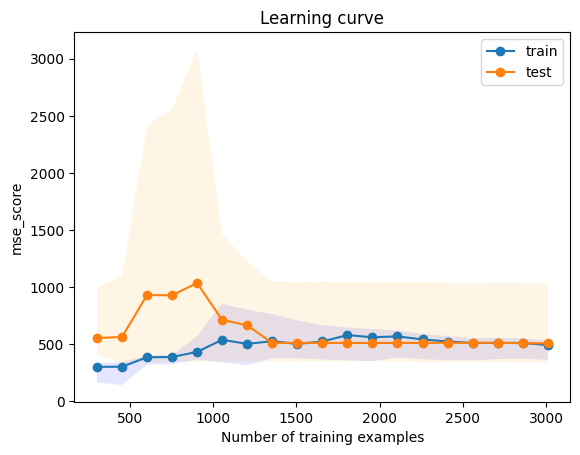

In [42]:
utils.plot_learning_curve(train_sizes_abs, train_scores, test_scores, y_label="mse_score")

**Q4.1) What would you say about the need for more data?**:
    
- A) If more examples are expensive to come by, it doesn't make sense to gather more data
- B) Even if more examples are expensive to come by, we should gather more data
- C) Our model doesn't need more than 1000 samples
- D) None of the above

Enter your answer below wrapped by quotes, for example:

```
answer_q41 = "A"
```

In [44]:
# answer_q41 = 'A' or 'B' or 'C' or 'D'

answer_q41 = "A"

In [45]:
assert base64.b64encode(answer_q41.encode()) == b'QQ=='

That's a wrap! 

Hopefully you now have a better understanding of how to evaluate models and understand if they are underfitting, overfitting or are just the right fit. On the next unit we'll continue talking about model selection and complexity. See you there! 